In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('data/partidos_cebollitas.csv')

# Create a new feature 'diferencia_goles'
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']

# Filter matches involving 'Cebollitas FC'
df_cebollitas = df[(df['equipo_local'] == 'Cebollitas FC') | (df['equipo_visitante'] == 'Cebollitas FC')]

# Predictor variables
X = df_cebollitas[['posesion_local (%)', 'tiros_arco_local']]

# Target variable
y = df_cebollitas['diferencia_goles']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
# Display the model parameters

print(f"Intercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁, β₂): {model.coef_}")

for idx, col_name in enumerate(X.columns):
    print(f"If {col_name} increases by 1 unit, the target variable changes by {model.coef_[idx]} units.")

Intercept (β₀): -5.3834402473149
Coefficient (β₁, β₂): [ 0.14032761 -0.18235423]
If posesion_local (%) increases by 1 unit, the target variable changes by 0.14032761399844063 units.
If tiros_arco_local increases by 1 unit, the target variable changes by -0.1823542336237456 units.


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison_df = X_test.copy()
comparison_df['Diferencia Goles Real'] = y_test.values
comparison_df['Diferencia Goles Predicha'] = y_pred.round(2)
comparison_df.head(10)

,posesion_local (%),tiros_arco_local,Diferencia Goles Real,Diferencia Goles Predicha
89,41,5,0,-0.54
55,51,6,-1,0.68
58,42,10,0,-1.31
88,54,9,-2,0.55
83,47,3,3,0.66
94,46,5,0,0.16
7,56,5,-1,1.56
29,46,10,1,-0.75
21,53,7,0,0.78


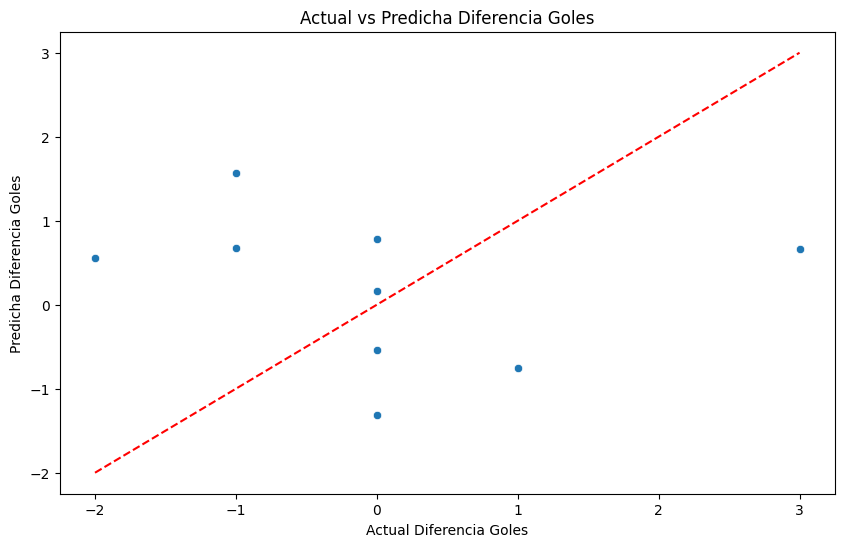

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Diferencia Goles')
plt.ylabel('Predicha Diferencia Goles')
plt.title('Actual vs Predicha Diferencia Goles')
# Plot y=x reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()

In [14]:
import ipywidgets as widgets

# Create interactive widgets for user input
posesion_slider = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='Posesión Local (%)')
tiros_slider = widgets.IntSlider(value=5, min=0, max=20, step=1, description='Tiros arco Local')

# Function to predict based on user input
def predict_diferencia_goles(posesion, tiros):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({'posesion_local (%)': [posesion], 'tiros_arco_local': [tiros]})
    prediction = model.predict(input_data)
    print(f'Predicha Diferencia Goles: {prediction[0]:.2f}')
# Display the interactive widgets
widgets.interact(predict_diferencia_goles, posesion=posesion_slider, tiros=tiros_slider);

interactive(children=(FloatSlider(value=50.0, description='Posesión Local (%)', step=1.0), IntSlider(value=5, …